# Final Project - Loans Dataset

Welcome to the final step on the Exploratory Data Analysis (EDA) module. Congratulations! This is the final project!


## Instructions

The objective of this project is to explore and solve problems on a Loans Dataset (`final_project_lending.csv`). This dataset contains information about credit applicants. Banks use this kind of datasets to create models to help on deciding on who to accept/refuse for a loan. Generally, after cleaning and organizing the dataset, the patterns of a good / bad applicant are learned by machine learning models.

Explore, test, evaluate, think, be sceptic! This is Data Science!


## Details on the dataset

The Target (Label) name is `bad_loan`, where $1$ means the observation is a default (person that ended up not paying the loan), and $0$ means the observation is a non-default (person that ended up paying the loan).

All the other features are characteristics of the applicant. 


## Delivery of Project

This jupyter notebook is to be delivered to evaluate your knowledge on the Exploratory Data Analysis module at Rumos, **before the FINAL DATE (end of day 16-02-2025)** agreed with the professor. Please add your name and e-mail next.

**Student Name**: "NAME_HERE"  
**E-mail**: "EMAIL_HERE"


## Plagiarism

Always remember that you are here to learn. Discussions on the final project are highly incentivised but please do not share your work. The struggle to solve the problems is needed in order to become a true Data Scientist. By allowing others to use your code you are making the world a worse place: you are not truly helping your colleague, and you are not promoting discussions on the topic.

In case you need help, or just want to discuss some project-related topics, reach out to me either through email or through a Slack direct message.

In [123]:
# NOTE: You can import any library you might find useful besides the following ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

In [124]:
# RUN this cell: load the dataset (do NOT delete this cell)
data = pd.read_csv('final_project_lending.csv', low_memory=False)

# Objectives

Please solve the following exercises by creating a markdown cell with **# EXERCISE >>NUMBER<<**  just before you solve it (you can use the number of cells you need after that).

1. Take a **quick look** at your dataset. If you could say something about it in two sentences, what would it be?

2. **Data Visualization**. *A picture is worth a thousand words.* Do not forget all the tips made on the Data Visualization class! Visualize the data as much as needed to truly understand the data. You should, at the least do the following (but do visualize more than these, as that knowledge will help you on the next tasks):

    2.1. Pick two numerical variables. Create a **scatter plot**. Describe what you see.  
    2.2. Create a **bar plot** from the data that you think is relevant. Explain.  
    2.3. Create a beautiful **heatmap**. Remember what are they useful to show (correlations...)?  
    2.4. Create a **distribution plot** with a feature broken down by target. Don't forget to add some alpha.  
    2.5. (Optional, but incentivized) Create an additional **insightful plot**. Describe the insight.  

3. Fully characterize, in term of **descriptive statistics**, the variables `id`, `annual_inc` and `grade`. -> revise these.

4. Correlation.

    4.1. What are the two most correlated numerical features (Spearman) - absolute number?  
    4.2. What is the numerical feature most correlated with the target (Pearson)?  

5. Are there any **outliers**? If there are, solve them. **Justify** all detected outliers, and **justify** the method you chose to eliminate. 

6. Deal with the **missing values**, along with anomalies. Detect and eliminate them. Remember: not all missing values are represented by a `np.nan`.

7. **Feature Selection**. Select at least two numerical features to drop. Justify the method(s) you used, and why you chose those variables. (Note: you can drop more variables, either categorical or numerical.)

8. **Pipelines** (scikit-learn). Load the dataset again and **select only the numerical variables**.

    8.1. Create a pipeline with three steps: (1) [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) with `strategy=’median’`; (2) One Scaler you may know; (3) [Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (with final 5 features)  
    8.2. Fit and Transform your dataset.  
    8.3. Comment what you obtained.  

9. Create a new Pipeline with, **at least, one Transformer created by you**. This Transformer should help on solving one of the issues the dataset has such as for example, outliers, dropping columns based on any particular characteristic, encoding, etc. Then, fit and transform the dataset. NOTE: you can choose to work only with **numerical** or **categorical** variables to ease your work.


## Evaluation
Points (of a total of 100%):
1. 5%  
2. 20%  
3. 10%  
4. 10%  
5. 10%  
6. 10%  
7. 10%  
8. 10% 
9. 5%

Final 10% for additional effort and conclusions beyond what was asked (give your _extra mile_).

## Important notes
1. Data Science is all about *flow*. Keep your analysis work-flow consistent.  
2. When it is requested you to *describe* something, please be 1. sceptic, 2. objective, and 3. succinct! 
3. If you don't know: search, invent, study, but please don't leave any exercise blank.

### Good luck!
# 3, 2, 1, GO! GO! GO!

---

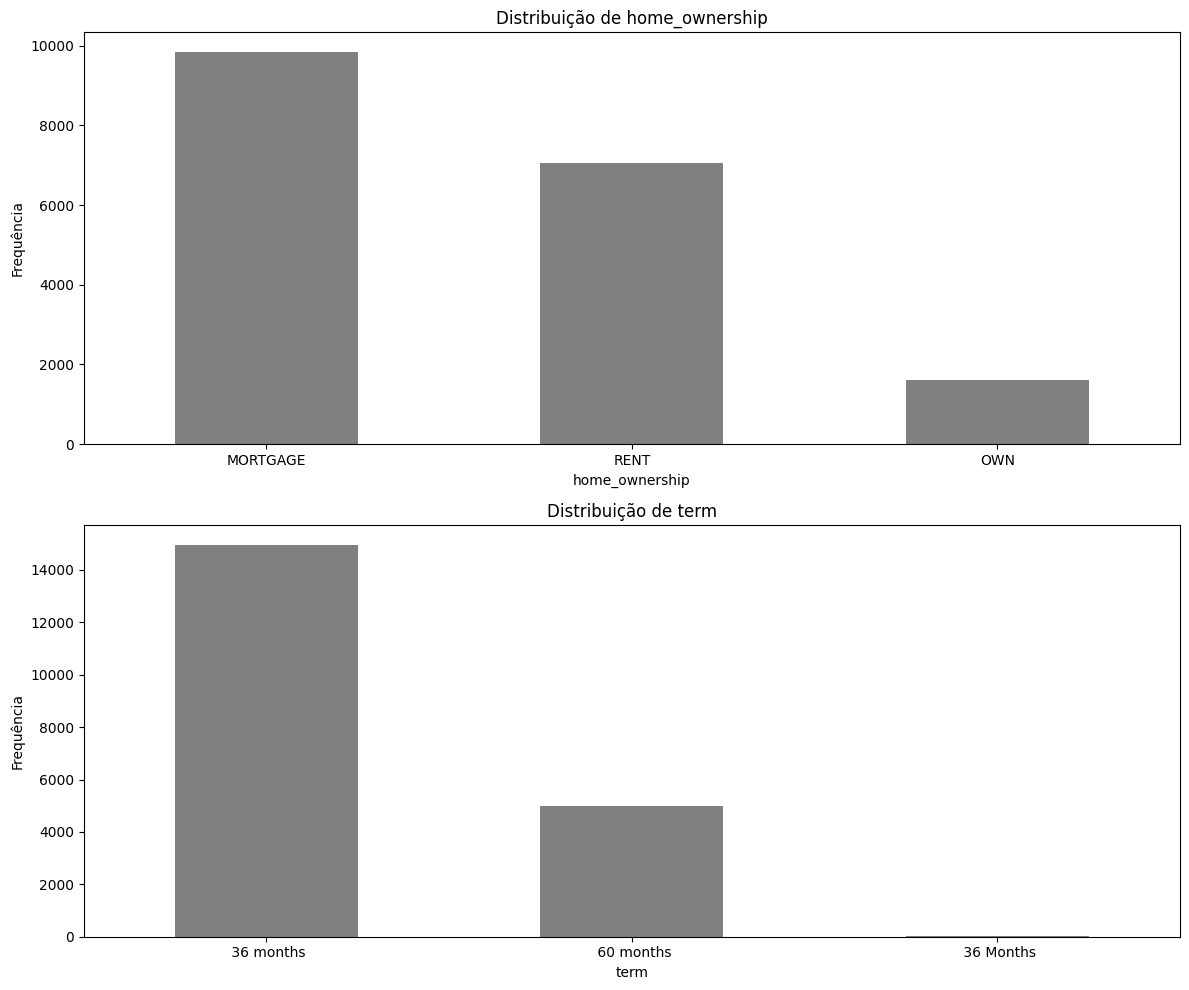

In [125]:
# Contagem das variáveis categóricas
categorical_columns = ['home_ownership', 'term']
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

for ax, col in zip(axes.flatten(), categorical_columns):
    data[col].value_counts().plot(kind='bar', ax=ax,color='gray')
    ax.set_title(f'Distribuição de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequência')
    ax.tick_params(axis='x', rotation=0) 
    
plt.tight_layout()
plt.show()

In [126]:
data['term'].unique()

array([' 36 months', ' 60 months', ' 36 Months'], dtype=object)

---

# EXERCISE 1

---

Obter as dimensões do DataFrame e apresentar o número de linhas (observações) e colunas (variáveis)

In [127]:
data.shape

(20000, 15)

 Obter algumas estatísticas descritivas do DataFrame

In [128]:
data.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


Consultar tipos de dados das variaveis como também contagem de valore não nulos.

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

Apresentar aleatóriamente 10 registos para analisar formato de dados. 

In [500]:
data.sample(100)

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
7311,8095509,C,30348.0,1,0,RENT,19.57,debt_consolidation,36 months,1,NaN,75.7,15.0,0.507745,1
9018,8567450,B,65000.0,0,4,NaN,10.91,debt_consolidation,36 months,1,NaN,46.9,0.0,0.809210,0
2267,11054982,D,108000.0,0,10,NaN,10.67,debt_consolidation,36 months,0,NaN,61.0,0.0,0.337780,0
12120,9035208,E,40000.0,0,9,MORTGAGE,0.12,small_business,36 months,0,NaN,0.4,0.0,0.000688,0
9321,8646475,C,70000.0,0,5,MORTGAGE,12.93,debt_consolidation,36 months,1,1.0,47.9,0.0,0.372789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11380,9065289,D,65000.0,0,3,RENT,23.97,debt_consolidation,60 months,1,NaN,12.9,0.0,0.406247,1
39,10076700,E,90300.0,0,11,MORTGAGE,3.52,debt_consolidation,36 months,0,NaN,31.0,0.0,0.197952,0
16599,6166846,G,96000.0,0,8,MORTGAGE,21.01,debt_consolidation,36 months,1,NaN,80.4,0.0,0.250489,1
15610,5957667,D,80000.0,0,11,OWN,11.61,other,36 months,0,NaN,26.4,0.0,0.659726,0


Apresentar nº de valore nulos por variavel

In [131]:
data.isnull().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

Calcular proporção de empréstimos que entraram em incumprimento (bad_loan equal to 1)

In [132]:
bad_loan_percentage = (data['bad_loan'].sum() / len(data)) * 100
print(f"Percentagem de empréstimos que entraram em incumprimento: {bad_loan_percentage:.2f}%")

Percentagem de empréstimos que entraram em incumprimento: 20.00%


O conjunto de dados contém informações sobre empréstimos de crédito, é constituido por 20 mil registos e 15 variáveis, incluindo variáveis numéricas e categóricas. Algumas variáveis apresentam valores em falta, destacando-se "home_ownership" e "last_major_derog_none". A taxa de incumprimento dos créditos (Target) pode ser observada através da coluna "bad_loan", onde se verifica que 20% dos processos de crédito resultaram em incumprimento. A variável "revol_util" (uso de crédito rotativo) apresenta um valor máximo anormal de 5010, possivelmente um erro, uma vez que representa a taxa de utilização da linha de crédito rotativo.


# EXERCISE 2

---

### EXERCISE 2.1

---

O código abaixo utiliza a função `pairplot` da biblioteca `seaborn` para criar um gráfico de dispersão entre todas as combinações de variáveis numéricas do conjunto de dados `data`. Para uma análise geral e identificação de possiveis padrões.

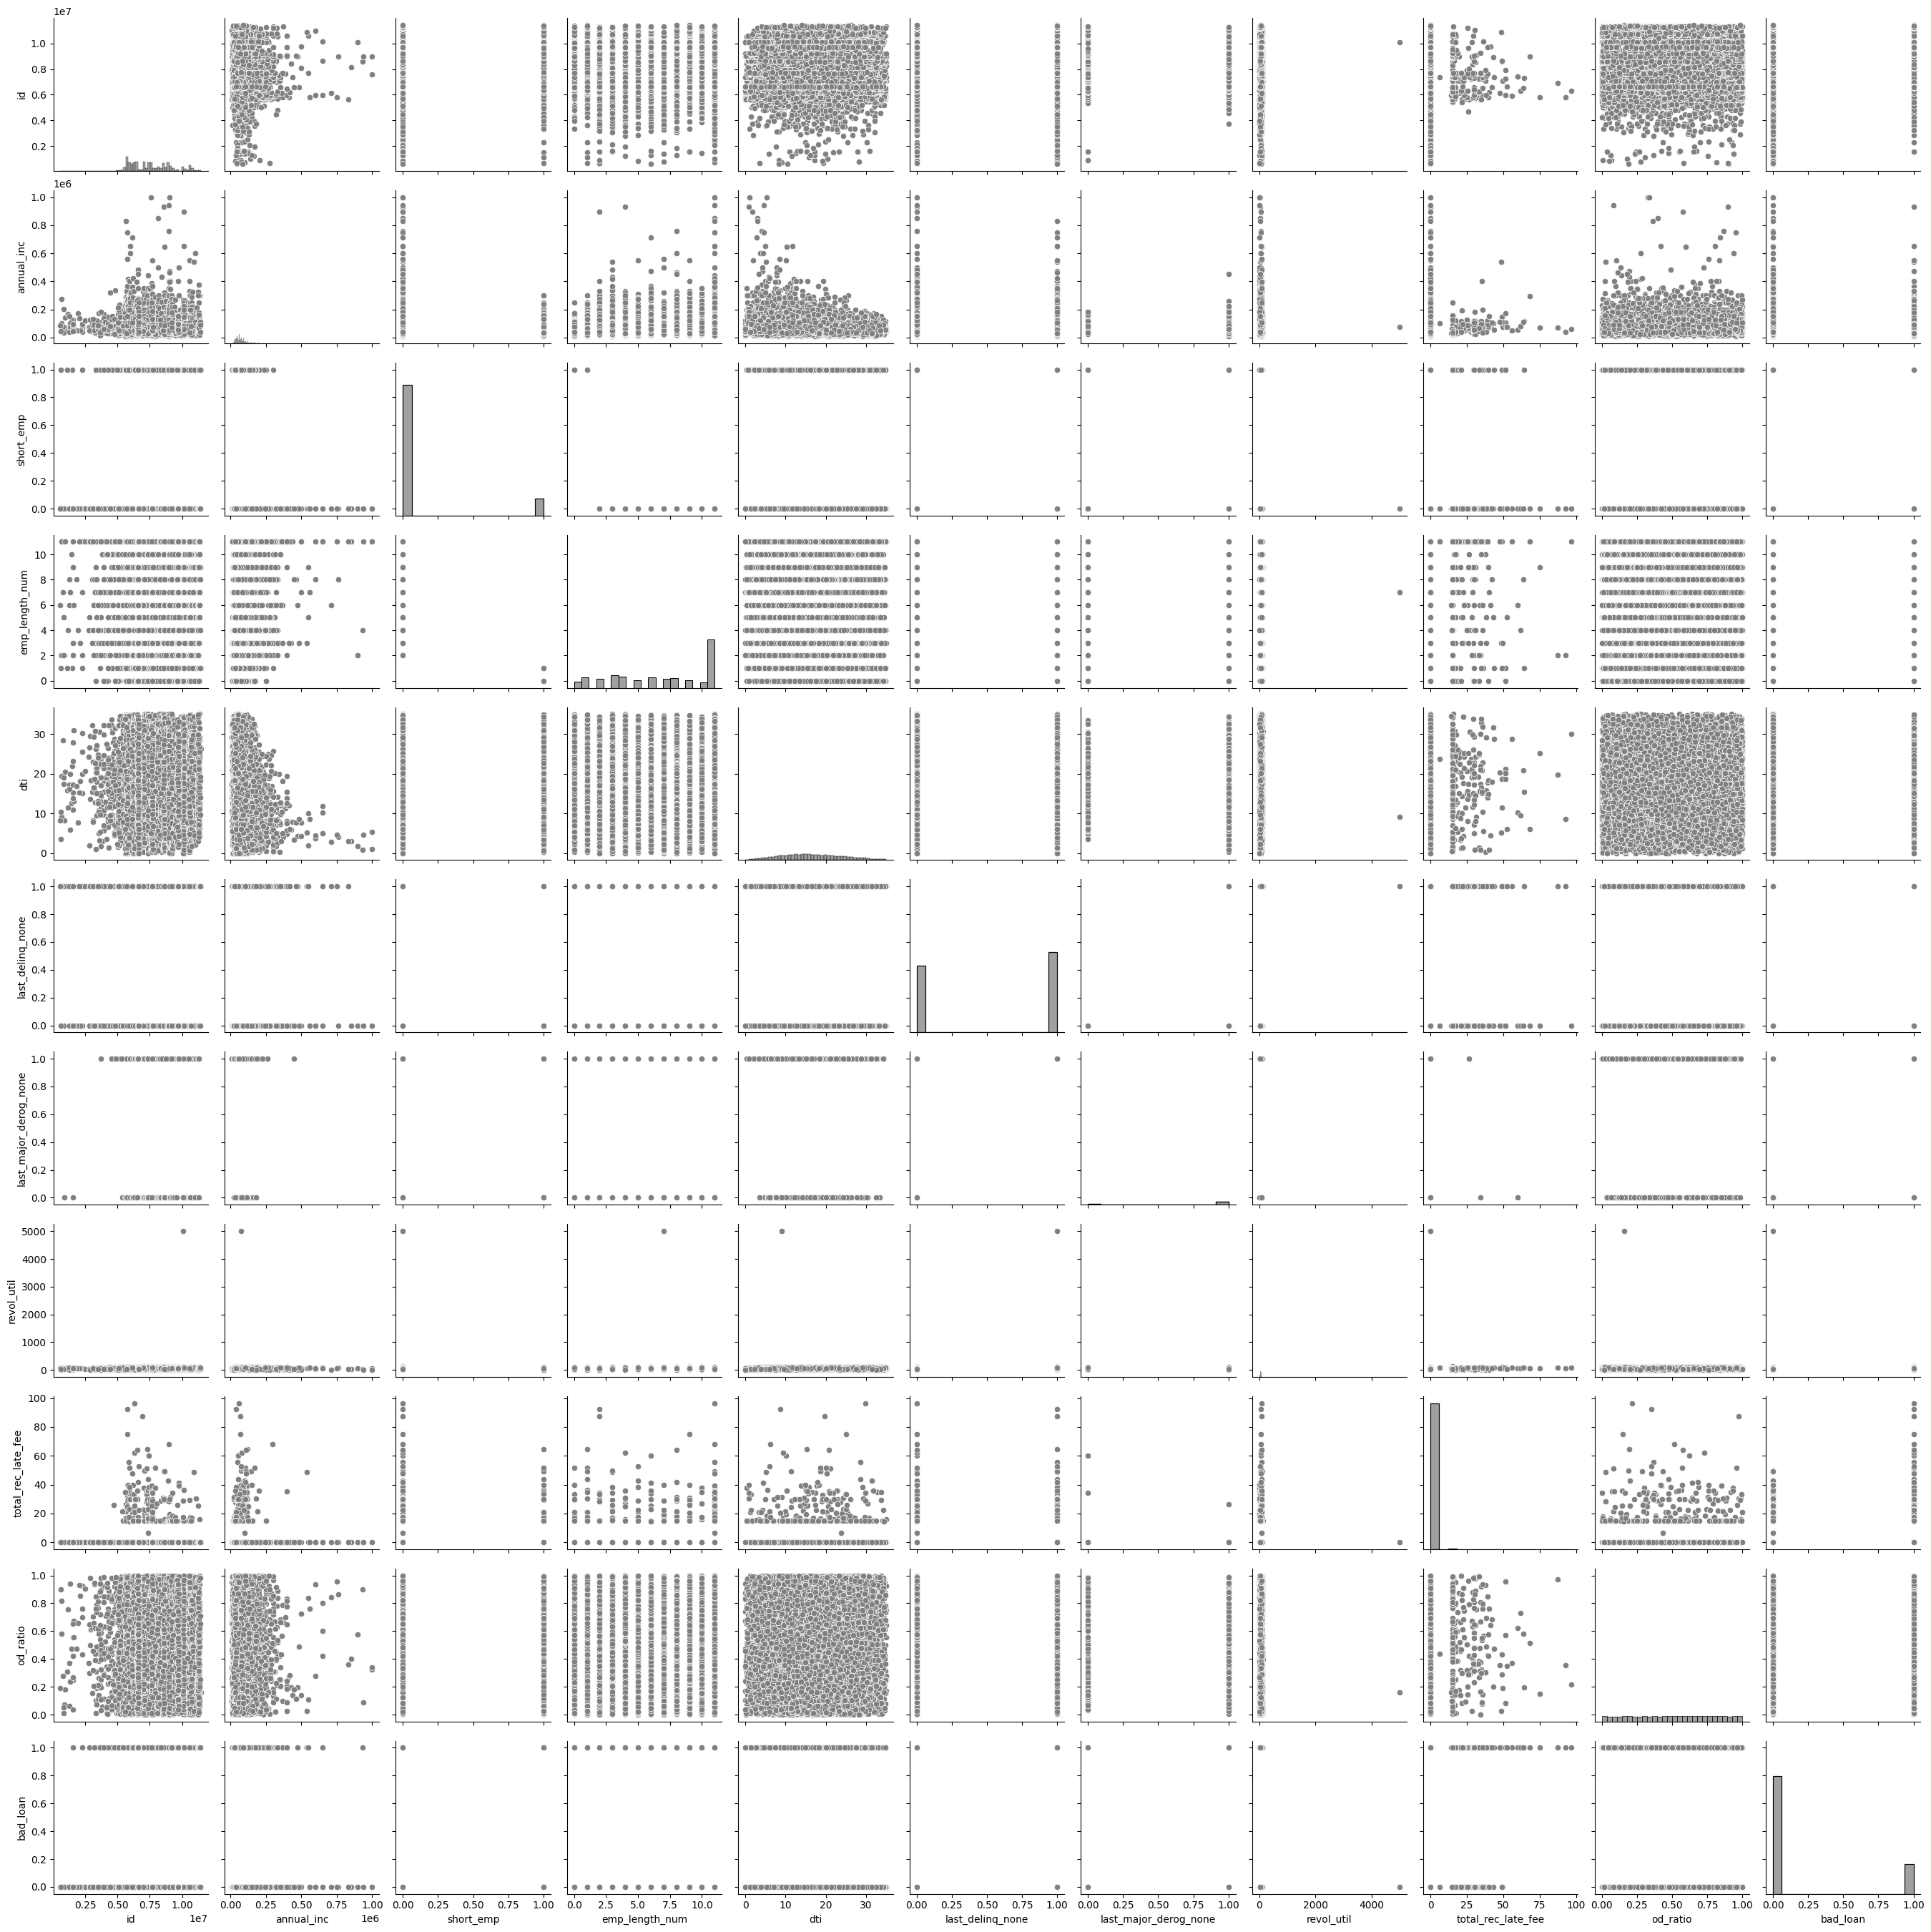

In [133]:
sns.pairplot(data, plot_kws={'color': 'gray'}, diag_kws={'color': 'gray'})
plt.show()

Construção de Gráfico de Dispersão entre Rendimento Anual e Rácio Dívida/Rendimento.

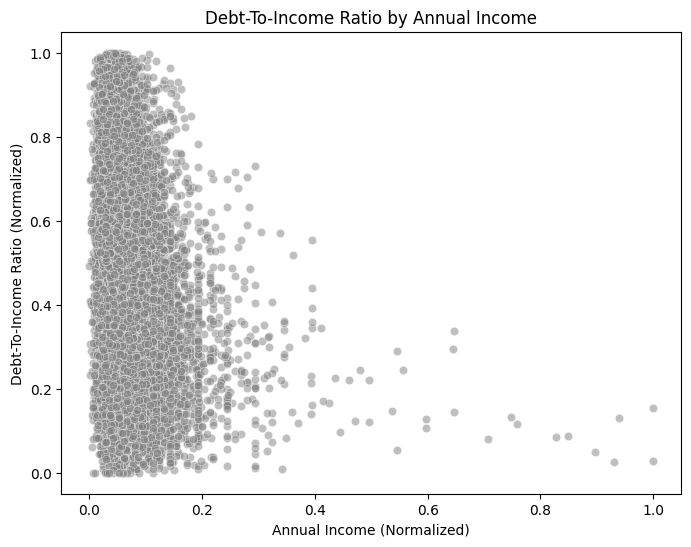

In [134]:
# Definir as variáveis de interesse
selected_vars = ["annual_inc", "dti"]

# Aplicar Min-Max Scaling para normalização das variaveis em novo dataframe
scaler = MinMaxScaler()
df_scaled = data.copy()
df_scaled[selected_vars] = scaler.fit_transform(data[selected_vars])

# Criar scatterplot com variáveis normalizadas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["annual_inc"], y=df_scaled["dti"], alpha=0.5, color='gray')
plt.xlabel("Annual Income (Normalized)")
plt.ylabel("Debt-To-Income Ratio (Normalized)")
plt.title("Debt-To-Income Ratio by Annual Income")
plt.show()

O gráfico de dispersão entre rendimento anual (annual_inc) e rácio dívida/rendimento (dti) ilustra a relação entre o rácio de endividamento/ rendimento e o rendimento dos indivíduos analisados. Apesar da dispersão dos dados, observa-se um padrão geral: à medida que o rendimento anual aumenta, o DTI tende a diminuir, o que sugere que, em média, indivíduos com rendimentos mais elevados possuem uma menor proporção de dívida face aos seus rendimentos.

No entanto, existem casos de indivíduos com rendimentos mais elevados que apresentam um DTI superior a outros com rendimentos inferiores. Isto indica que um rendimento mais alto não implica necessariamente um menor risco de crédito, uma vez que alguns indivíduos têm  elevados níveis de endividamento, independentemente dos seus ganhos. Assim, a variável Rendimento Anual, por si só, pode não ser suficiente para prever  o risco de incumprimento de um empréstimo, sendo necessário considerar outras variaveis com a DTI para uma avaliação mais completa.

### EXERCISE 2.2

---

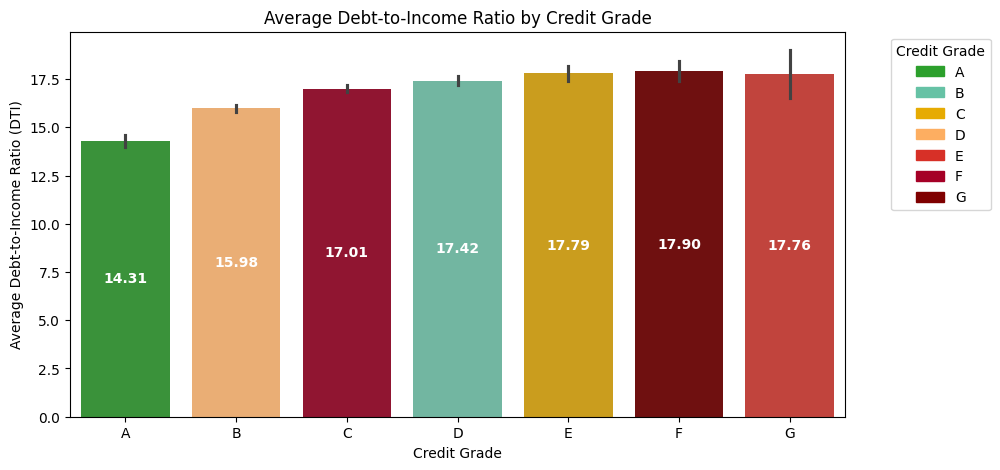

In [135]:
# Definir a ordem correta das grades
grades_ordered = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Definir cores da paleta verde → vermelho para as grades
grade_colors = {
    "A": "#2ca02c",  # Verde (baixo risco) 
    "B": "#66c2a5",  # Verde claro
    "C": "#e6ab02",  # Amarelo
    "D": "#fdae61",  # Laranja
    "E": "#d73027",  # Vermelho
    "F": "#a50026",  # Vermelho escuro
    "G": "#7f0000"   # Vermelho mais intenso
}


# Criar o gráfico de barras para o DTI médio por Grade
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x=data["grade"],
    y=data["dti"],
    hue=data["grade"], 
    order=grades_ordered,
    palette=[grade_colors[g] for g in grades_ordered],  # Aplicar gradiente de cores personalizado
    dodge=False  # Evitar deslocamento das barras
)

# Remover legenda duplicada, se existir
#if ax.get_legend() is not None:
#    ax.get_legend().remove()

# Adicionar valores dentro das barras, centralizados verticalmente e em branco
dti_means = data.groupby("grade")["dti"].mean().reindex(grades_ordered)
for i, (grade, value) in enumerate(dti_means.items()):
    plt.text(i, value / 2, f"{value:.2f}", ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Adicionar rótulos e título 
plt.xlabel("Credit Grade")
plt.ylabel("Average Debt-to-Income Ratio (DTI)")
plt.title("Average Debt-to-Income Ratio by Credit Grade")

# Criar legendas personalizadas
legend_patches = [mpatches.Patch(color=grade_colors[grade], label=f"{grade}") for grade in grades_ordered]
plt.legend(handles=legend_patches, title="Credit Grade", bbox_to_anchor=(1.05, 1), loc="upper left")

# Exibir o gráfico
plt.show()



O gráfico apresenta a média do Rácio Dívida/Rendimento (DTI) por classificação de risco de crédito (Grade), utilizando uma escala de cores que varia do verde (menor risco - Grade A) ao vermelho (maior risco - Grade G). De forma geral, observa-se que, à medida que a classificação de crédito piora (de A para G), a média do DTI aumenta, indicando que os empréstimos com classificações mais baixas refletem uma maior dificuldade no cumprimento das obrigações financeiras.

As barras de erro representam a variabilidade dos valores de DTI dentro de cada grade, ajudando a compreender as diferenças na dispersão dos dados. Na maior parte das classificações, as barras de erro mantêm-se relativamente consistentes, mas destaca-se a Grade G, onde a barra de erro é significativamente maior. Esse fenómeno pode ser explicado pelo menor número de observações disponíveis para essa categoria, tornando a estimativa da média também  menos precisa e também poderá explicar um melhoramento minimo de DTI da classificação F para G.

Apesar dessa pequena variação contra o padrão geral confirma-se: à medida que a classificação de crédito se deteriora, a média do DTI tende a aumentar, refletindo um maior comprometimento financeiro dos emprestimos.

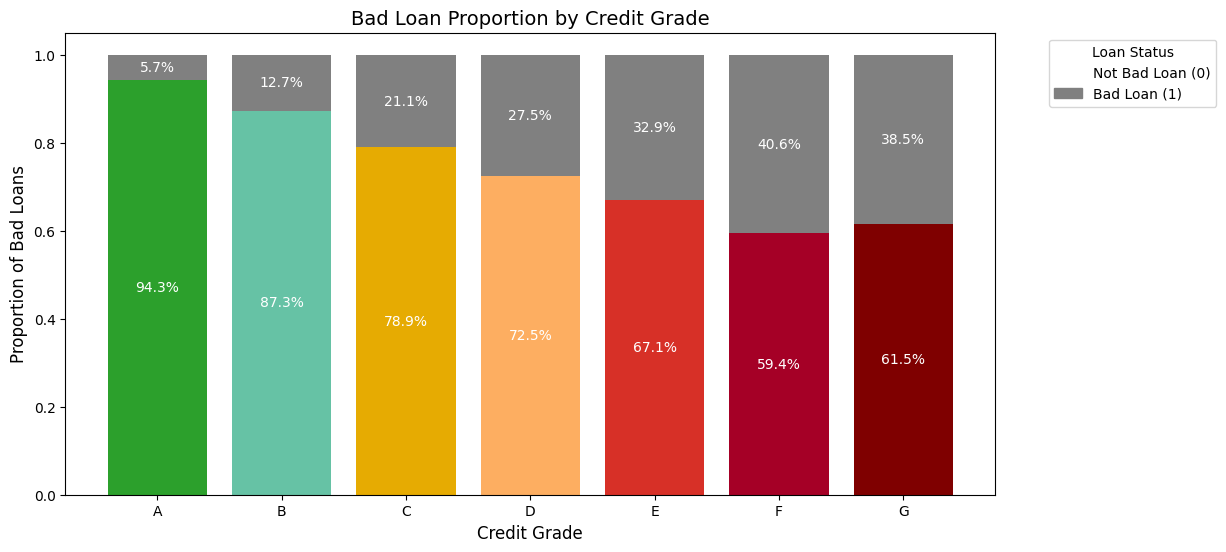

In [136]:
# Criar Tabela Pivot para calcular a proporção de empréstimos em incumprimento por grade
df_pivot_grade_loanstatus = data.groupby('grade')['bad_loan'].value_counts(normalize=True).unstack()

# Definir a ordem correta das grades e garantir que todas estejam presentes
grades_ordered = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df_pivot_grade_loanstatus = df_pivot_grade_loanstatus.reindex(grades_ordered)

# Definir cores da paleta verde → vermelho para as grades
grade_colors = {
    "A": "#2ca02c",  # Verde (baixo risco) #2ca02c
    "B": "#66c2a5",  # Verde claro
    "C": "#e6ab02",  # Amarelo
    "D": "#fdae61",  # Laranja
    "E": "#d73027",  # Vermelho
    "F": "#a50026",  # Vermelho escuro
    "G": "#7f0000"   # Vermelho mais intenso
}

colors = [grade_colors[grade] for grade in grades_ordered]
plt.figure(figsize=(12, 6))
plt.bar(grades_ordered, df_pivot_grade_loanstatus.iloc[:, 0], label='Not Bad Loan (0)', color=colors)
plt.bar(grades_ordered, df_pivot_grade_loanstatus.iloc[:, 1], 
        bottom=df_pivot_grade_loanstatus.iloc[:, 0], 
        label='Bad Loan (1)', color='grey')

# Adicionar valores dentro das barras
for i, grade in enumerate(grades_ordered):
    # Valor do segmento "Não Incumprimento"
    plt.text(i, df_pivot_grade_loanstatus.iloc[i, 0] / 2, 
             f"{df_pivot_grade_loanstatus.iloc[i, 0]:.1%}", 
             ha='center', va='center', color='white', fontsize=10)
    # Valor do segmento "Incumprimento"
    plt.text(i, df_pivot_grade_loanstatus.iloc[i, 0] + df_pivot_grade_loanstatus.iloc[i, 1] / 2, 
             f"{df_pivot_grade_loanstatus.iloc[i, 1]:.1%}", 
             ha='center',va='center', color='white', fontsize=10)

# Adicionar rótulos e título
plt.title('Bad Loan Proportion by Credit Grade', fontsize=14)
plt.xlabel('Credit Grade', fontsize=12)
plt.ylabel('Proportion of Bad Loans', fontsize=12)

# Criar legendas personalizadas
nao_incumprimento_patch = mpatches.Patch(color='white', label='Not Bad Loan (0)')
incumprimento_patch = mpatches.Patch(color='grey', label='Bad Loan (1)')

# Adicionar a legenda ao gráfico
plt.legend(handles=[nao_incumprimento_patch, incumprimento_patch], title='Loan Status', bbox_to_anchor=(1.05, 1))
plt.show()

O gráfico apresenta a proporção de empréstimos em incumprimento e em cumprimento para diferentes classificações de risco de crédito, que variam de A (menor risco) a G (maior risco). Observa-se o padrão seguinte, à medida que a classificação piora (de A para G), a percentagem de incumprimento aumenta. Clientes com classificações A e B apresentam uma taxa de incumprimento mais baixa, enquanto categorias como D a G registam um aumento significativo na percentagem de incumprimento, refletindo um risco de crédito mais elevado. Este padrão sugere que o sistema de classificação de crédito corresponde aos níveis de incumprimento observados.

A utilização de uma escala de cores do verde (A) ao vermelho (G) facilita a visualização da relação entre risco e incumprimento, permitindo identificar rapidamente as categorias de maior e menor risco.

### EXERCISE 2.3

---

In [137]:
#Selecionar as variáveis numéricas, excluir identificador do empréstimo
numeric_df = data.select_dtypes(include=['number'])
numeric_df.drop(columns=['id'], inplace=True)

#Calculate the Pearson correlation
corr_pearson = numeric_df.corr(method='pearson',numeric_only=True)
#Calculate the Spearman correlation
corr_spearman = numeric_df.corr(method='spearman',numeric_only=True)

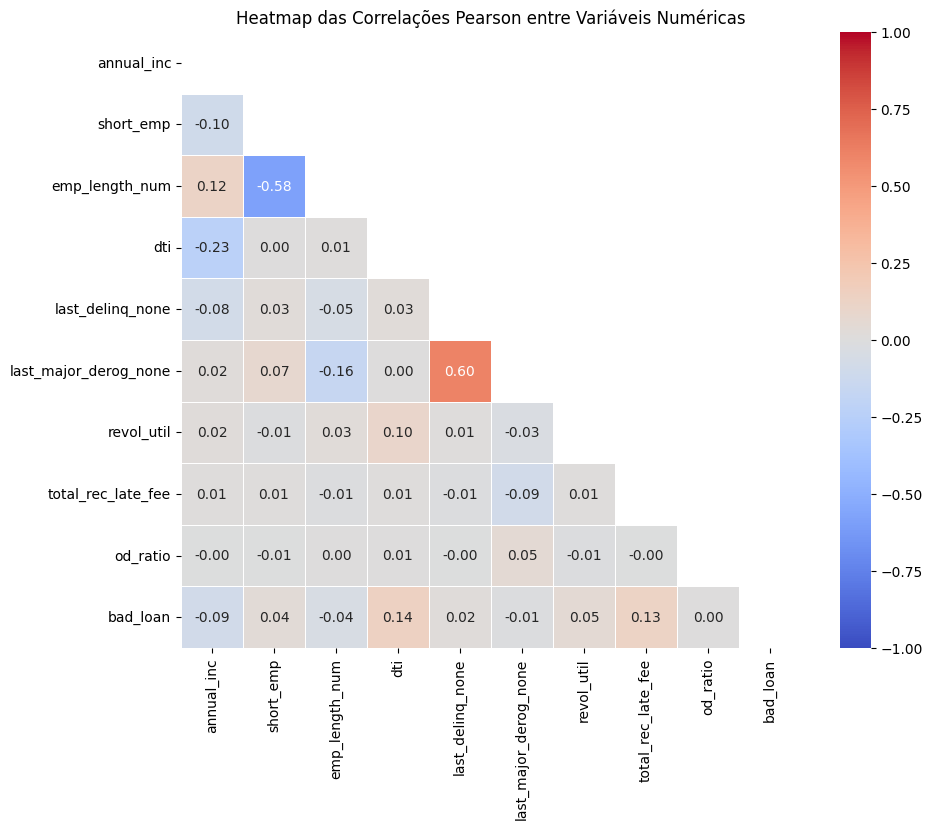

In [138]:
# Criar um heatmap Person das correlações entre variáveis numéricas
mask = np.triu(np.ones_like(corr_pearson))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,mask=mask,vmin=-1,vmax=1,)

# Configurar título
plt.title("Heatmap das Correlações Pearson entre Variáveis Numéricas", color="black")

# Exibir o gráfico
plt.show()


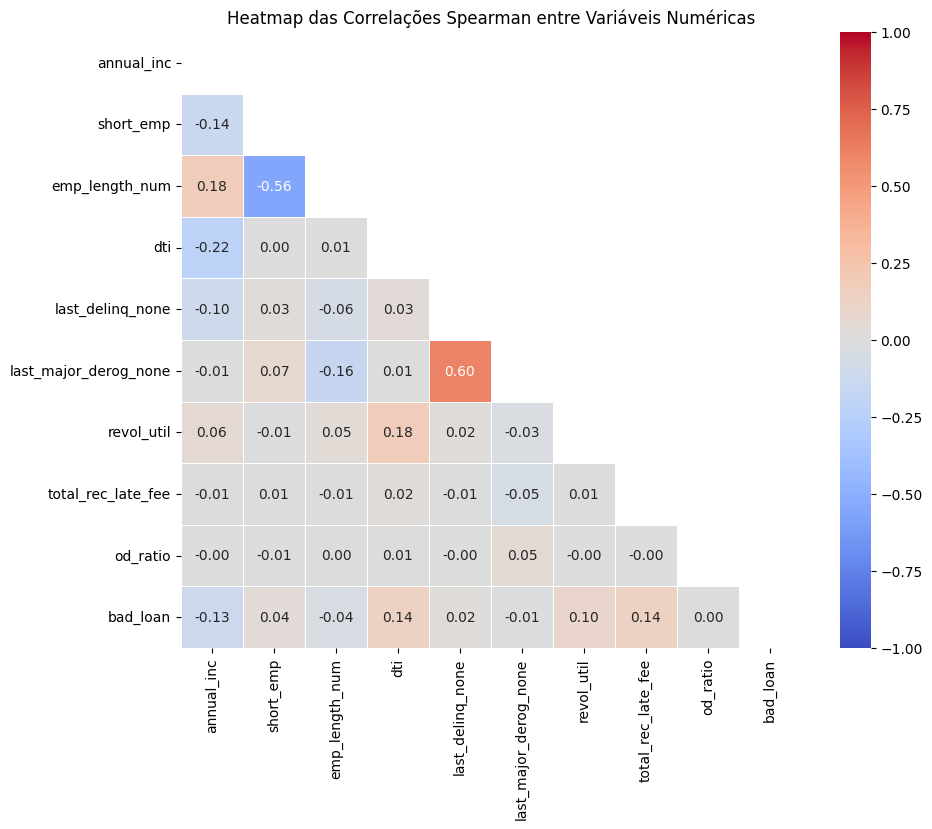

In [139]:
# Criar um heatmap Spearmn das correlações entre variáveis numéricas
mask = np.triu(np.ones_like(corr_spearman))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,mask=mask,vmin=-1,vmax=1,)

# Configurar título
plt.title("Heatmap das Correlações Spearman entre Variáveis Numéricas", color="black")

# Exibir o gráfico
plt.show()


O heatmap acima apresenta as correlações entre variáveis numéricas, utilizando tons azul, cinza a vermelho para facilitar a visualização das relações mais fortes, onde as cores mais fortes nas tonalidades vermelhas e azul indicam correlações mais elevadas e as mais claras representam correlações mais fracas. Observa-se uma correlação significativa entre last_delinq_none e last_major_derog_none (0,60), o que sugere que quem já teve uma delinquência recente tem maior probabilidade de ter registado uma classificação de risco grave com 90 ou mais dias de atraso.

Além disso, verifica-se uma correlação negativa entre annual_inc e dti (-0,23), indicando que, quanto maior o rendimento, menor o peso da dívida sobre este, o que sugere que pessoas com rendimentos mais elevados tendem a apresentar um nível de endividamento inferior. Para ambos os valores de correlação referidos, foram calculados os respetivos valores-p, obtendo-se valores próximos de zero, o que confirma que a correlação é estatisticamente significativa. O calculo é feito abaixo. 

In [140]:
def calc_correlation(data, var1, var2):
    """
    Calcula a correlação de Pearson e Spearman entre duas variáveis,
    removendo valores nulos antes do cálculo.
    
    Parâmetros:
    - data: DataFrame dados
    - var1: Nome da primeira variável
    - var2: Nome da segunda variável
    
    Retorna:
    - dicionário contendo os valores das correlações e p-values
    """
    # Remover valores nulos
    df_clean_corr = data.dropna(subset=[var1, var2])
    
    # Calcular a correlação de Pearson
    pearson_corr, pearson_p = scipy.stats.pearsonr(df_clean_corr[var1], df_clean_corr[var2])
    
    # Calcular a correlação de Spearman
    spearman_corr, spearman_p = scipy.stats.spearmanr(df_clean_corr[var1], df_clean_corr[var2])
    
    # Retornar os resultados
    return {
        "pearson_corr": pearson_corr,
        "pearson_p_value": pearson_p,
        "spearman_corr": spearman_corr,
        "spearman_p_value": spearman_p
    }


Calcular a correlação entre variavies 'last_delinq_none', 'last_major_derog_none'

In [141]:

result_corr = calc_correlation(data, 'last_delinq_none', 'last_major_derog_none')
print(result_corr)

{'pearson_corr': np.float64(0.6032673979655274), 'pearson_p_value': np.float64(3.494069707607259e-58), 'spearman_corr': np.float64(0.6032673979655275), 'spearman_p_value': np.float64(3.494069707606952e-58)}


Calcular a correlação entre variaveis 'annual_inc', 'dti'

In [142]:
result_corr = calc_correlation(data, 'annual_inc', 'dti')
print(result_corr)

{'pearson_corr': np.float64(-0.2302187367113181), 'pearson_p_value': np.float64(5.395690963323319e-237), 'spearman_corr': np.float64(-0.2234259264191358), 'spearman_p_value': np.float64(5.5451847596024445e-223)}


### EXERCISE 2.4

---

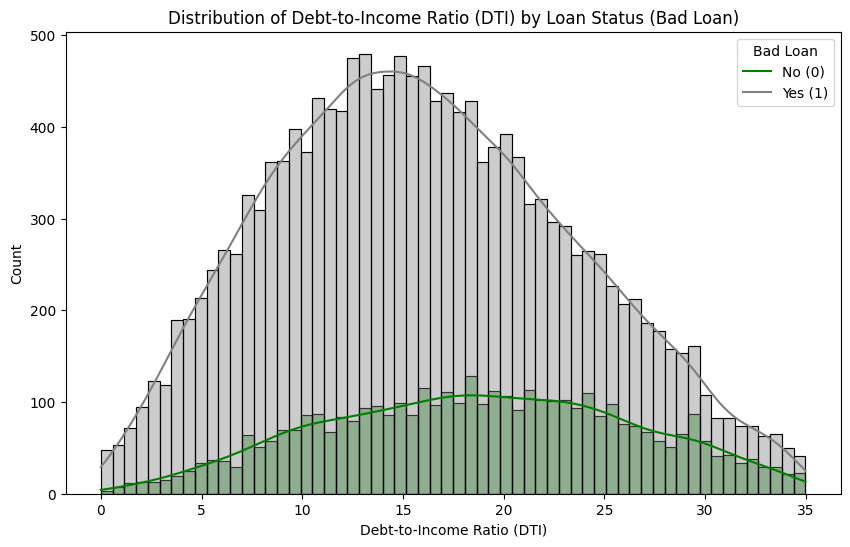

In [143]:
# Criar um histograma para a variável DTI (Rácio Dívida/Rendimento) segmentado por estado do empréstimo
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="dti", hue="bad_loan", bins=60, alpha=0.4, kde=True, palette={0: "grey", 1: "green"})  

# Adicionar rótulos e título
plt.xlabel("Debt-to-Income Ratio (DTI)")
plt.ylabel("Count")
plt.title("Distribution of Debt-to-Income Ratio (DTI) by Loan Status (Bad Loan)")
plt.legend(title="Bad Loan", labels=["No (0)", "Yes (1)"])

# Exibir o gráfico
plt.show()


O gráfico apresenta a distribuição do Rácio Dívida/Rendimento (DTI) dos empréstimos, diferenciando entre aqueles que cumpriram os pagamentos dos seus empréstimos e aqueles que entraram em incumprimento. Observa-se que a maioria dos clientes tem um DTI relativamente baixo, com a distribuição concentrada nos valores menores e uma cauda que se estende para valores mais elevados.
A distribuição dos clientes que não entraram em incumprimento (bad_loan = 0) e dos que incumpriram (bad_loan = 1) apresenta um padrão semelhante, sugerindo que ambos os grupos possuem uma ampla variação nos valores de DTI. No entanto, é possível verificar que os clientes em incumprimento têm uma maior concentração em faixas mais elevadas de DTI, o que faz sentido, pois um rácio dívida/rendimento mais alto significa que uma maior percentagem do rendimento está comprometida, reduzindo a capacidade de lidar com obrigações.

### EXERCISE 2.5 (Optional, but incentivized) Create an additional **insightful plot**. Describe the insight.  


---

In [146]:
import plotly.express as px


#Build the plot here:
fig = px.scatter(
    data,
    x='dti',
    y='od_ratio',
    color='grade',
    color_discrete_map={'Hummer': 'deepskyblue', 'McLaren': '#FF8000'},
    labels={'milage': 'Mileage', 'price': 'Price'},
    title='Mileage - Price by Brand',
)

fig.update_traces(hovertemplate='<b>Mileage:</b> %{x}<br><b>Price:</b> %{y}$') #
 

fig.update_layout(
    legend_title_text='Brand',
    plot_bgcolor='white'
)

fig.show()


# Exercise 3

---

Fully characterize, in term of **descriptive statistics**, the variables `id`, `annual_inc` and `grade`. -> revise these.

 A variavel `id` é uma variavel categorica que identifica o pedido de empréstimo, ou seja, serve como identificador unico, portanto em termos de estatisticas tradicionais, não existe muito a analisar, além de verificar se a mesma é é constituida por valores distintos e não existe valore nulos. Apesar do seu aspecto ser um numero não tem significado matemático.

In [149]:
# Verificação se todos os valores são distintos
data["id"].nunique() == len(data)

True

 A variavel `annual_inc` é uma variavel numérica, olhando para o histograma da distribuição, podemos verificar  uma forte assimetria à direita, indicando que a maioria dos clientes tem rendimentos relativamente baixos ou médios, enquanto um número reduzido de clientes possui rendimentos muito elevados. 
 A existência de uma cauda longa à direita sugere a presença de outliers, ou seja, clientes com rendimentos muito acima da média.


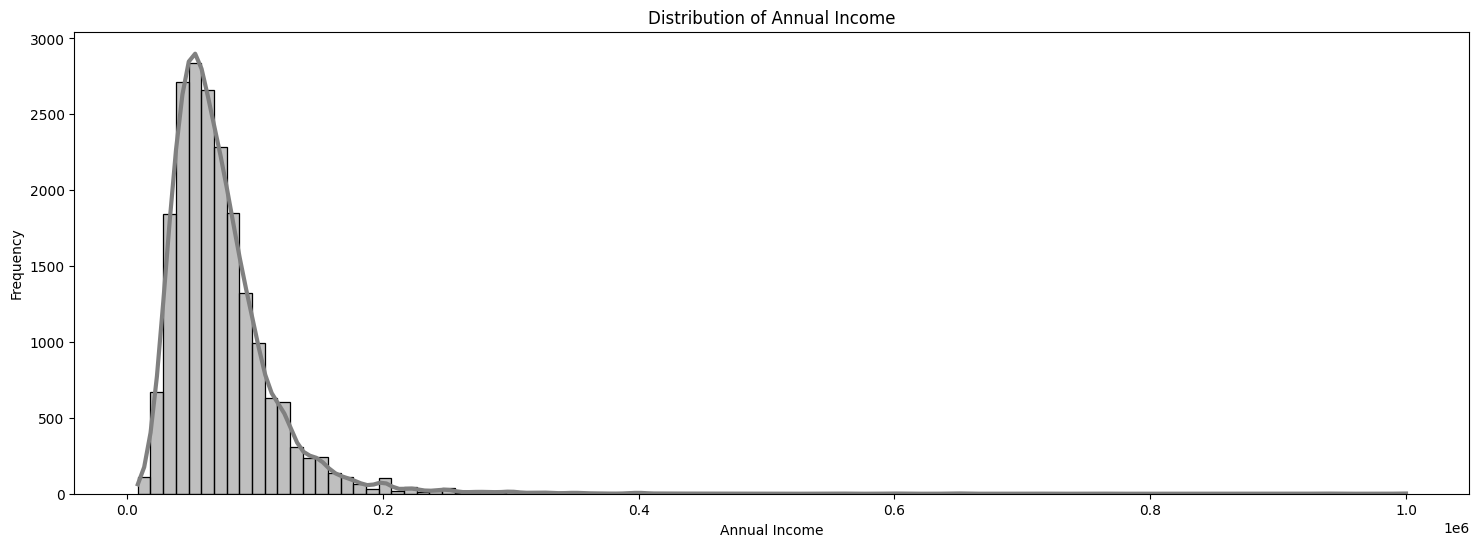

In [150]:
# Criar um histograma para a distribuição do rendimento anual (annual_inc)
plt.figure(figsize=(18, 6))
sns.histplot(data, x="annual_inc", bins=100, kde=True,line_kws={'lw': 3},color='grey')

# Adicionar rótulos e título
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income")

# Exibir o gráfico
plt.show()

In [151]:
#Carlcular média Rendimento Anual
print(f'Average Annual Income: {data.annual_inc.mean()}')

#Carlcular Mediana Rendimento Anual
print(f'Median Depth of Diamonds is: {data.annual_inc.median()}')

Average Annual Income: 73349.57835
Median Depth of Diamonds is: 65000.0


In [152]:
#Calcular Desvio Padrão  Rendimento Anual
print(f'Standard Deviation of Annual Income: {data.annual_inc.std()}')


Standard Deviation of Annual Income: 45198.567254725625


In [153]:
#Calcular Min e Max dos Rendimento Anual
print(f'Min Annual Income: {data.annual_inc.min()}')
print(f'Max Annual Income: {data.annual_inc.max()}')

Min Annual Income: 8412.0
Max Annual Income: 1000000.0


In [154]:
# Calcular os quantis 0.25 e 0.75 para Rendimento Anual
quantile_25 = data['annual_inc'].quantile(0.25)
quantile_75 = data['annual_inc'].quantile(0.75)

print(f"Quantile 0.25 of Annual Income: {quantile_25}")
print(f"Quantile 0.75 of Annual Income: {quantile_75}")


Quantile 0.25 of Annual Income: 47000.0
Quantile 0.75 of Annual Income: 88000.0


In [155]:
#Calculate Skewness Rendimento Anual
print(f'Skewness of Annual Income is: {scipy.stats.skew(data.annual_inc)}')

Skewness of Annual Income is: 5.275648123592321


In [156]:
#Calculate Kurtosis Rendimento Anual
print(f'Kurtosis of Annual Income is: {scipy.stats.kurtosis(data.annual_inc)}')

Kurtosis of Annual Income is: 66.72665803201564


A distribuição do rendimento anual apresenta uma forte assimetria à direita, caracterizada por uma média de 73,349.58 e uma mediana inferior, de 65,000.00, o que indica que existem valores elevados que puxam a média para cima. A maioria dos rendimentos concentra-se abaixo da média, sugerindo que a distribuição não é simétrica.

A variabilidade dos rendimentos é elevada, com um desvio padrão de 45198.57, mostrando que os valores estão bastante dispersos em relação à média. O intervalo entre os 25% e os 75% mais centrais situa-se entre 47,000.00 e 88,000.00, indicando que metade da população ganha dentro desta faixa. No entanto, há valores extremos, uma vez que o rendimento mínimo é 8,412.00, enquanto o máximo atinge 1000000, sugerindo a presença de outliers.

Olhando para o valor obtido em Skewness, confirma-se assimetria positiva (5.28) reforçando a distribuição é fortemente inclinada para a direita, ou seja, significa que a maior parte dos indivíduos tem rendimentos mais baixos, mas existem alguns com rendimentos muito elevados que estendem a cauda da distribuição. Além disso, o valor obtido em Kurtosis  extremamente elevada (66.73) indica que a distribuição é muito mais pontiaguda do que uma distribuição normal, significando que há uma alta concentração de valores próximos da mediana e uma cauda longa com valores extremos muito distantes.

A variável `grade` é uma variável categórica ordinal, onde as classificações de A a G representam diferentes níveis de risco associados à taxa de incumprimento do empréstimo. Quanto melhor a classificação (A), menor é o risco, enquanto classificações mais baixas (G) indicam um maior risco de incumprimento.

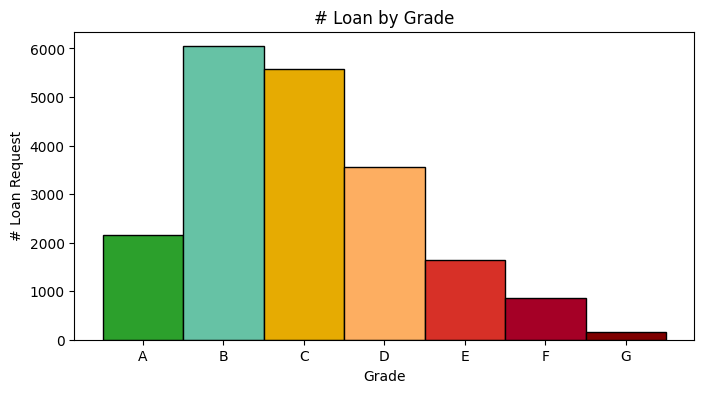

In [157]:
# Garantir que a variável "grade" é categórica e ordenada
data["grade"] = pd.Categorical(data["grade"], categories=grades_ordered, ordered=True)

# Criar o histograma 
plt.figure(figsize=(8, 4))

# Criar barras manualmente para garantir cores s
ax = sns.histplot(data=data, x="grade", discrete=True)

# Aplicar cores manualmente a cada barra
for patch, grade in zip(ax.patches, grades_ordered):
    patch.set_facecolor(grade_colors[grade])

# Adicionar títulos e rótulos
plt.title("# Loan by Grade")
plt.xlabel("Grade")
plt.ylabel("# Loan Request")

# Exibir o gráfico
plt.show()


Em termos de medida centrais

In [158]:
#Use the mode to identify the most common category
print(f'The most common type of Grade is: {data.grade.mode()[0]}')

The most common type of Grade is: B


Em termos de medida de dispersão

In [159]:
#Get the number of unique categories
print(f'The number of unique categories is: {data.grade.nunique()}')

The number of unique categories is: 7


In [160]:
#Get the names of the unique categories in the form of a list
print(f'The names of categories are : {data.grade.unique().tolist()}')

The names of categories are : ['A', 'D', 'E', 'B', 'G', 'C', 'F']


In [161]:
#What is the frequency of the various categories?
print(f'The volume of examples in each category are: \n\n{data.grade.value_counts()}')

The volume of examples in each category are: 

grade
B    6042
C    5566
D    3554
A    2159
E    1645
F     865
G     169
Name: count, dtype: int64


In [162]:
#Print the percentage of values in each grade
print(f'The percentage of values in each grade are: \n\n{data.grade.value_counts(normalize=True)*100}')


The percentage of values in each grade are: 

grade
B    30.210
C    27.830
D    17.770
A    10.795
E     8.225
F     4.325
G     0.845
Name: proportion, dtype: float64


Existem 7 categorias únicas na variavel `grade` variável: (A, B, C, D, E, F e G), sendo a categoria mais comum a (B). A distribuição dos exemplos por categoria demonstra que mais de metade dos emprestimos se encontra nas classificações  (B e C), enquanto as categorias de maior risco (F e G) representam uma menor percentagem do total.

Em termos de frequência relativa (% do total), verifica-se que:
B e C representam mais de metade dos exemplos do dataset (cerca de 58%), o que sugere que a maioria dos empréstimos tem um risco de crédito moderado. As classes de menor risco (A) representam cerca de 10.8% do total, indicando que apenas uma pequena parte dos empréstimos tem uma classificação muito favorável.
As classes de maior risco (F e G) representam apenas cerca de 5.2%, o que sugere que empréstimos concedidos a clientes de risco elevado são menos comuns. Esta distribuição pode ser explicada por critérios de avaliação de risco utilizados na concessão de crédito, onde clientes com classificações mais baixas podem ter um menor acesso a empréstimos.

# Exercise 4

---

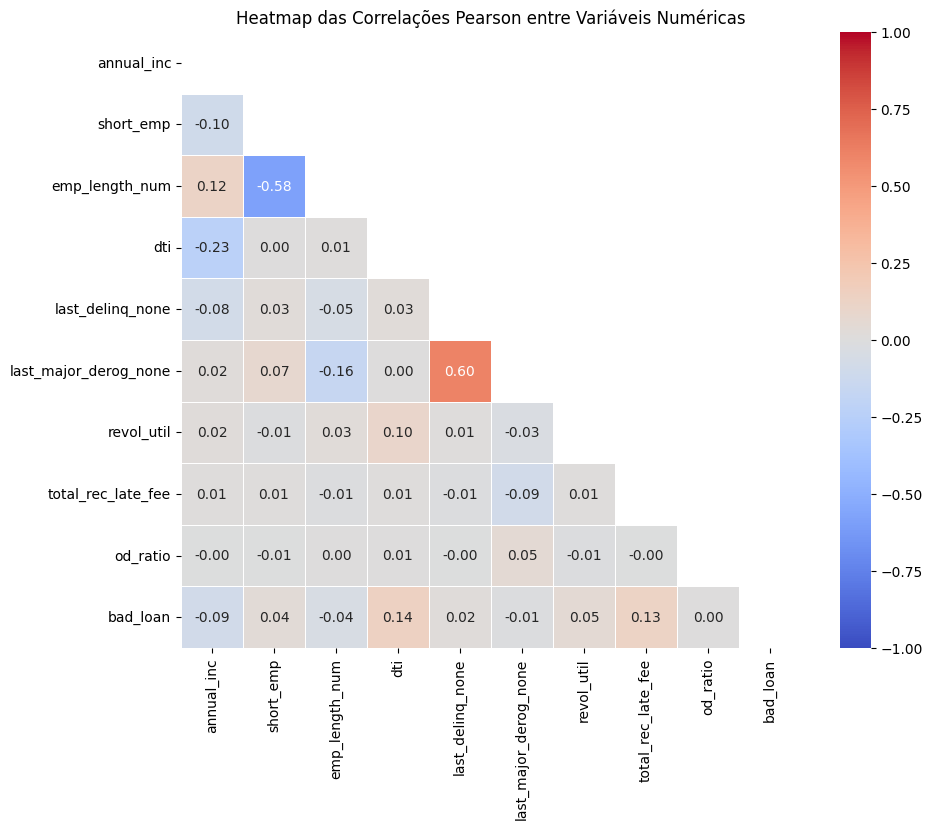

### EXERCISE 4.1

In [180]:
#Selecionar as variáveis numéricas, excluir identificador do empréstimo
numeric_df = data.select_dtypes(include=['number'])
numeric_df.drop(columns=['id'], inplace=True)


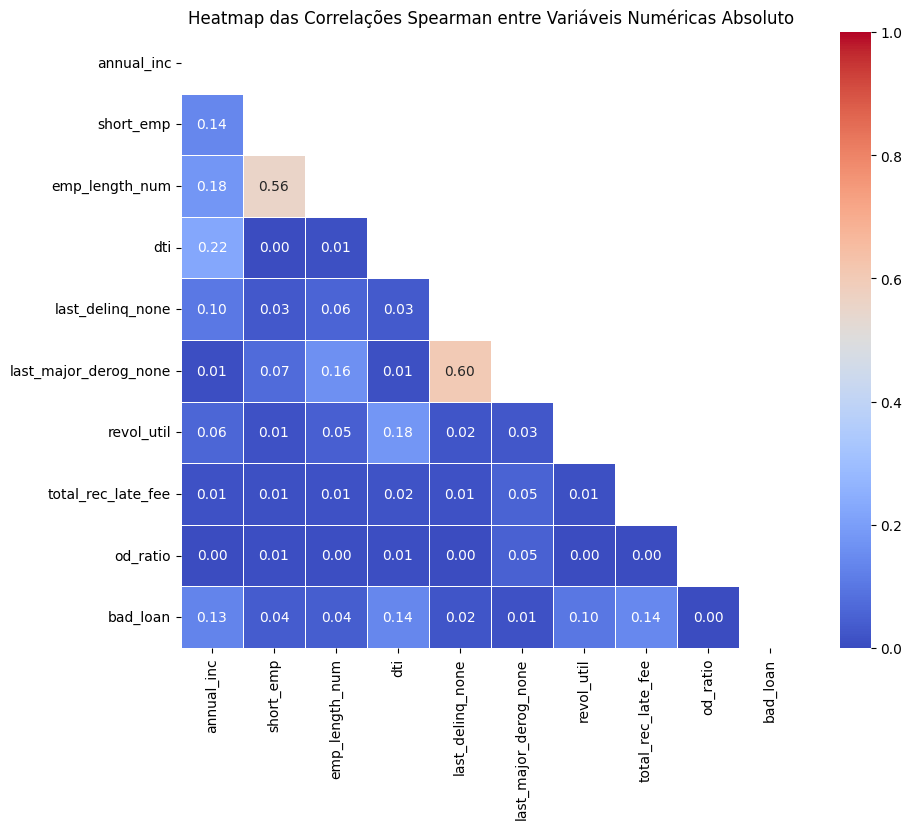

In [ ]:
#Calcular correlação Spearman
corr_spearman = numeric_df.corr(method='spearman',numeric_only=True)

#Colocar em Valores Absolutos
corr_spearman  = corr_spearman .abs()

# Criar um heatmap Spearman das correlações entre variáveis numéricas
mask = np.triu(np.ones_like(corr_spearman))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,mask=mask,vmin=0,vmax=1,)

# Configurar título
plt.title("Heatmap das Correlações Spearman entre Variáveis Numéricas Absoluto", color="black")

# Exibir o gráfico
plt.show()



In [194]:
print(f"Corr last_delinq_none, last_major_derog_none - {calc_correlation(data, 'last_delinq_none', 'last_major_derog_none')}")
print(f"Corr emp_length_num, short_emp - {calc_correlation(data, 'emp_length_num', 'short_emp')}")

Corr last_delinq_none, last_major_derog_none - {'pearson_corr': np.float64(0.6032673979655274), 'pearson_p_value': np.float64(3.494069707607259e-58), 'spearman_corr': np.float64(0.6032673979655275), 'spearman_p_value': np.float64(3.494069707606952e-58)}
Corr emp_length_num, short_emp - {'pearson_corr': np.float64(-0.5825795873471269), 'pearson_p_value': np.float64(0.0), 'spearman_corr': np.float64(-0.5579248072588023), 'spearman_p_value': np.float64(0.0)}


Olhando para os valores de correlação de Spearman, podemos identificar que a relação mais forte entre variáveis numéricas ocorre entre “last_major_derog_none” e “last_delinqu_none”, com um coeficiente de correlação de 0.60. O p-value associado a esta correlação é 3,49 × 10⁻⁵⁸, um valor extremamente pequeno, indicando que esta correlação é altamente significativa do ponto de vista estatístico.
A segunda relação mais forte observa-se entre “emp_length_num” e “short_emp”, com uma correlação de 0.56. Este valor indica que a duração da experiência profissional de um indivíduo está moderadamente associada ao facto de ter um histórico de emprego curto, o que faz sentido, pois uma maior experiência tende a corresponder a um menor número de empregos curtos.
Para esta segunda correlação, o p-value é 0,0, o que significa que a relação é estatisticamente muito significativa, reforçando a ideia de que existe uma ligação consistente entre estas duas variáveis. 

### EXERCISE 4.2

In [214]:
print("column                  pearson-corr  pval")
numeric_df_clean = numeric_df.dropna()
for col in numeric_df_clean.columns:
    corr, pval = scipy.stats.pearsonr(numeric_df_clean[col], numeric_df_clean.bad_loan)    
    print(f"{col: <22}  {corr: >5.2f}         {pval:4.2f}")

column                  pearson-corr  pval
annual_inc              -0.13         0.00
short_emp               -0.01         0.77
emp_length_num          -0.03         0.46
dti                      0.22         0.00
last_delinq_none         0.01         0.73
last_major_derog_none   -0.00         0.94
revol_util               0.16         0.00
total_rec_late_fee       0.14         0.00
od_ratio                -0.06         0.18
bad_loan                 1.00         0.00


A análise da correlação de Pearson entre as diversas variáveis numéricas e a variável bad_loan revelou que variável dti (rácio dívida/rendimento) apresenta a maior correlação, sendo esta uma correlação positiva moderada (r = 0,22), indicando que clientes mais endividados tendem a ter um maior risco de incumprimento. Como o p-value é 0,00, esta relação é estatisticamente significativa.

# Exercise 5

In [222]:
# Selecionar apenas variáveis numéricas para análise de outliers
numeric_df = data.select_dtypes(include=['number'])

# Remover valores nulos do DataFrame antes da análise
numeric_df_clean = numeric_df.dropna()

# Criar um DataFrame para armazenar as contagens de outliers
outlier_counts = {}

# Método IQR para deteção de outliers
for col in numeric_df_clean.columns:
    Q1 = numeric_df_clean[col].quantile(0.25)
    Q3 = numeric_df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = numeric_df_clean[(numeric_df_clean[col] < lower_bound) | (numeric_df_clean[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Criar um DataFrame com as variáveis e a contagem de outliers
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Número de Outliers'])
outlier_df = outlier_df.sort_values(by='Número de Outliers', ascending=False)

print(outlier_df)



                       Número de Outliers
last_major_derog_none                 135
bad_loan                              112
short_emp                              60
annual_inc                             17
total_rec_late_fee                      4
id                                      2
emp_length_num                          0
last_delinq_none                        0
dti                                     0
revol_util                              0
od_ratio                                0


In [226]:
# Definir uma função para consultar outliers de uma variável específica
def get_outliers_list(dataframe, coluna):
    """
    Esta função recebe um DataFrame e o nome de uma variável numérica e retorna os outliers dessa variável
    usando o método do Intervalo Interquartil (IQR).
    
    Parâmetros:
    - dataframe: DataFrame pandas contendo os dados
    - coluna: Nome da variável numérica a ser analisada

    Retorno:
    - DataFrame contendo apenas os outliers da variável especificada
    """
    if coluna not in dataframe.columns:
        print(f" A variável '{coluna}' não existe no DataFrame.")
        return None

    Q1 = dataframe[coluna].quantile(0.25)
    Q3 = dataframe[coluna].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar os outliers
    outliers = dataframe[(dataframe[coluna] < lower_bound) | (dataframe[coluna] > upper_bound)]

    if outliers.empty:
        print(f"✅ Nenhum outlier encontrado na variável '{coluna}'.")
        return None
    else:
        print(f"🔍 **Outliers encontrados na variável '{coluna}':**")
        return outliers[[coluna]]



In [229]:
def plot_histogram(data, x_column, bins=100, kde=True, line_width=3, title='Depth Distribution of Diamonds', xlabel='Diamond Depth', ylabel='# Diamonds', color=None):
    """
    Cria um histograma com opção de incluir uma linha KDE para um determinado DataFrame e coluna.

    Parâmetros:
        data (DataFrame): O DataFrame contendo os dados a serem plotados.
        x_column (str): O nome da coluna a ser plotada no eixo x.
        bins (int): Número de bins para o histograma (o padrão é 100).
        kde (bool): Indica se deve incluir uma linha KDE (o padrão é True).
        line_width (int): Espessura da linha KDE (o padrão é 3).
        title (str): Título do gráfico (o padrão é 'Distribuição da Profundidade dos Diamantes').
        xlabel (str): Rótulo para o eixo x (o padrão é 'Profundidade do Diamante').
        ylabel (str): Rótulo para o eixo y (o padrão é '# Diamantes').
    """
    
    fig = plt.figure(figsize=(18, 6))

    # cria histograma
    sns.histplot(
        data,
        x=x_column,
        bins=bins,
        kde=kde,
        line_kws={'linewidth': line_width, 'color': 'black'},
        color=color
    )


    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7) 


    # Show the plot
    plt.show()

In [509]:
# Exemplo de uso da função
variavel_a_analisar = "annual_inc"  # Nome da variável numérica que queres analisar
outliers_encontrados = get_outliers_list(numeric_df_clean, variavel_a_analisar)
print(outliers_encontrados)

🔍 **Outliers encontrados na variável 'annual_inc':**
       annual_inc
226      223000.0
558      185000.0
1625     153000.0
4716     260000.0
7953     165000.0
8292     160000.0
11862    180000.0
12138    220000.0
13408    200000.0
14998    170000.0
15230    225000.0
17611    180000.0
18261    180000.0
19297    165000.0
19386    450000.0
19561    175000.0
19877    184000.0


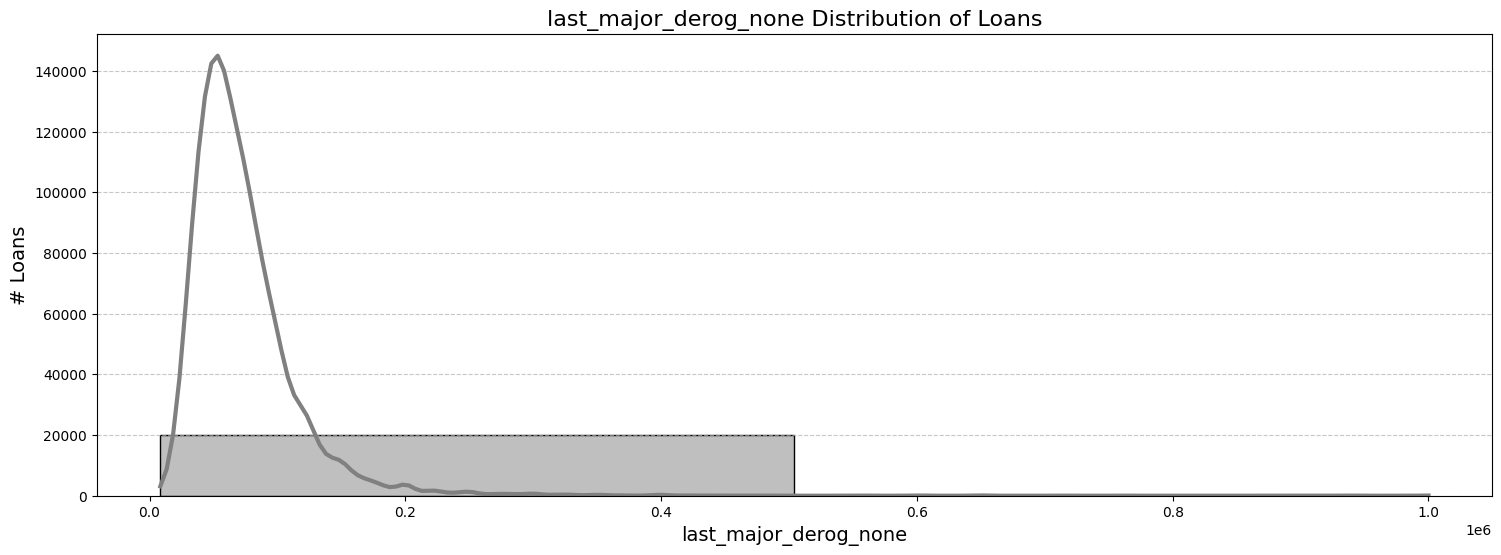

In [510]:
plot_histogram(data, 'annual_inc', bins=2, kde=True, line_width=3, title='last_major_derog_none Distribution of Loans', xlabel='last_major_derog_none', ylabel='# Loans',color='grey')
#por as linhas vermelhas ficam os outliers

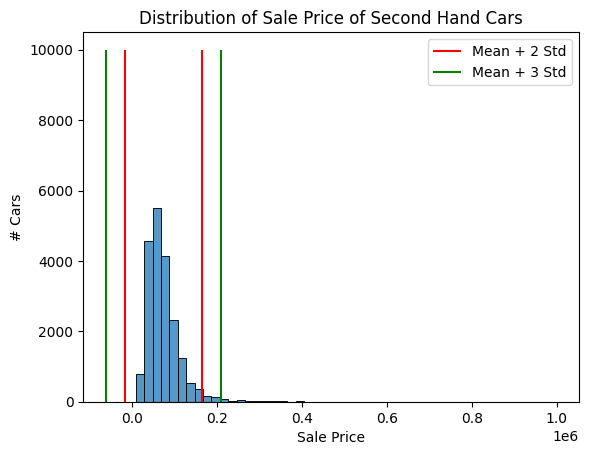

In [521]:

#Calculate the cut-off values if 2 std are selected
nbr_std = 2
#Calculate and store the mean
sale_mean = data.annual_inc.mean()
#Calculate and store the standard deviation
sale_std = data.annual_inc.std()
min_out_2_std = sale_mean - sale_std * nbr_std
max_out_2_std = sale_mean + sale_std * nbr_std

#Calculate the cut-off values if 3 std are selected
nbr_std = 3
min_out_3_std = sale_mean - sale_std * nbr_std
max_out_3_std = sale_mean + sale_std * nbr_std




sns.histplot(data.annual_inc,bins=50)
plt.title('Distribution of Sale Price of Second Hand Cars')
plt.xlabel('Sale Price')
plt.ylabel('# Cars')
plt.vlines(x=max_out_2_std,ymin=0,ymax=10000,colors=['red'],label='Mean + 2 Std')
plt.vlines(x=min_out_2_std,ymin=0,ymax=10000,colors=['red'])
plt.vlines(x=max_out_3_std,ymin=0,ymax=10000,colors=['green'],label='Mean + 3 Std')
plt.vlines(x=min_out_3_std,ymin=0,ymax=10000,colors=['green'])
plt.legend()
plt.show()

In [523]:
def analyze_outliers_std(dataframe, column, nbr_std=2):
    """
    This function calculates outlier thresholds based on the mean and standard deviation of the selected variable.
    It also generates a histogram with cutoff lines for 2 and 3 standard deviations.

    Parameters:
    - dataframe: Pandas DataFrame containing the data.
    - column: Name of the numerical variable to analyze.
    - nbr_std: Number of standard deviations to define outliers (default: 2).

    Returns:
    - DataFrame containing only identified outliers.
    - Distribution plot of the variable with highlighted limits.
    """
    if column not in dataframe.columns:
        print(f"❌ The variable '{column}' does not exist in the DataFrame.")
        return None

    # Calculate mean and standard deviation
    mean_value = dataframe[column].mean()
    std_dev = dataframe[column].std()

    # Calculate cutoff values for 2 standard deviations
    min_out_2_std = mean_value - std_dev * 2
    max_out_2_std = mean_value + std_dev * 2

    # Calculate cutoff values for 3 standard deviations
    min_out_3_std = mean_value - std_dev * 3
    max_out_3_std = mean_value + std_dev * 3

    # Filter outliers based on standard deviation thresholds
    outliers = dataframe[(dataframe[column] < min_out_2_std) | (dataframe[column] > max_out_2_std)]

    # Create histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(dataframe[column], bins=50, kde=True)
    plt.title(f'Distribution of Variable: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Add vertical lines for thresholds
    plt.axvline(x=max_out_2_std, color='red', linestyle='dashed', label='Mean + 2 Std')
    plt.axvline(x=min_out_2_std, color='red', linestyle='dashed')
    plt.axvline(x=max_out_3_std, color='green', linestyle='dashed', label='Mean + 3 Std')
    plt.axvline(x=min_out_3_std, color='green', linestyle='dashed')

    plt.legend()
    plt.show()

    if outliers.empty:
        print(f"✅ No outliers found in the variable '{column}' with {nbr_std} standard deviations.")
        return None
    else:
        print(f"🔍 **Outliers found in the variable '{column}':**")
        return outliers[[column]]






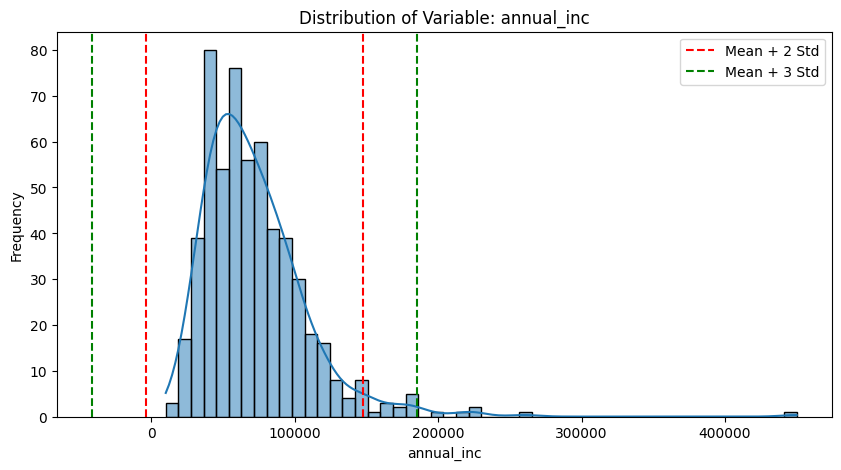

🔍 **Outliers found in the variable 'annual_inc':**


In [524]:
# Select only numerical variables for analysis
numeric_df = data.select_dtypes(include=['number'])

# Remove null values before analysis
numeric_df_clean = numeric_df.dropna()

# Analyze a specific variable for outliers
variable_to_analyze = "annual_inc"  # Name of the numerical variable to analyze
detected_outliers = analyze_outliers_std(numeric_df_clean, variable_to_analyze)

# Exercise 6

# Exercise 7

# Exercise 8

# Exercise 9